In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
tickers = ['AAPL', 'TSLA', 'META', 'XOM']
n_assets = len(tickers)
df = yf.download(tickers, start='2023-01-01', end='2024-12-31')
df = df['Close']
df = df.rename(columns={'AAPL':'Apple', 'TSLA':'Tesla', 'META':'Meta', 'XOM':'Exxon Mobil'})
df = df.dropna()

C:\Users\arthu\AppData\Local\Temp\ipykernel_5944\4131906733.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  4 of 4 completed


In [3]:
df_returns = df.pct_change()
mean_return = df_returns.mean()
mean_ann_return = mean_return*252

cov_matrix = df_returns.cov()
cov_ann_matrix = cov_matrix*252

In [4]:
#Generating random portfolios
n_portfolios = 10000
results = []
for i in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights = weights/np.sum(weights)
    port_return = np.dot(weights,mean_ann_return)
    port_vol = np.sqrt(np.dot(weights.T,np.dot(cov_ann_matrix,weights)))
    port_sharpe = port_return/port_vol
    results.append([port_return,port_vol,port_sharpe, weights])

In [5]:
portfolios = pd.DataFrame(results, columns=['Return','Volatility','Sharpe ratio', 'Weights'])
portfolios_sorted = portfolios.sort_values(by='Volatility')
portfolios_sorted['Cummax return'] = portfolios_sorted['Return'].cummax()
efficient_frontier = portfolios_sorted[portfolios_sorted['Return'] == portfolios_sorted['Cummax return']]

max_sharpe_index = portfolios['Sharpe ratio'].idxmax()
max_sharpe_port = portfolios.loc[max_sharpe_index]

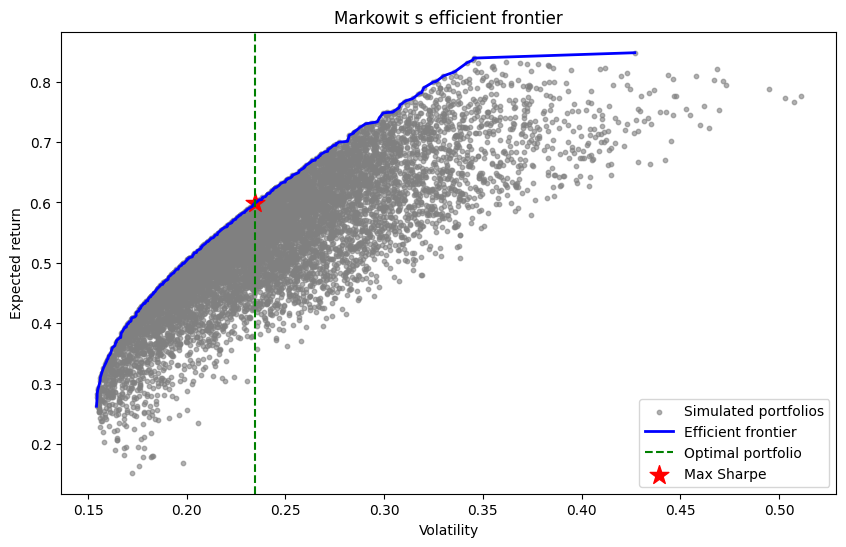

In [6]:
#Visualisation
plt.figure(figsize=(10,6))    
plt.scatter(portfolios['Volatility'], portfolios['Return'], c='gray', alpha=0.6, s=10, label='Simulated portfolios')
plt.plot(efficient_frontier['Volatility'], efficient_frontier['Return'], color='blue', linewidth=2, label='Efficient frontier')
plt.axvline(x=max_sharpe_port['Volatility'], color='green', linestyle='--', label='Optimal portfolio')
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Return'], color='red', marker='*', s=200, label='Max Sharpe')

plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.title('Markowit s efficient frontier')
plt.legend()
plt.show()

In [7]:
print(f"Max Sharpe ratio : {max_sharpe_port['Sharpe ratio']:.2f}")
print(f"Expected Return : {max_sharpe_port['Return']:.2%}")
print(f"Volatility : {max_sharpe_port['Volatility']:.2%}")

optimal_weights = max_sharpe_port['Weights']
print("Optimal weights :", [f"{w:.2%}" for w in optimal_weights])

Max Sharpe ratio : 2.55
Expected Return : 59.89%
Volatility : 23.44%
Optimal weights : ['34.96%', '43.18%', '10.50%', '11.36%']
